In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# 2.1

Text(0.5, 1.0, 'reliability')

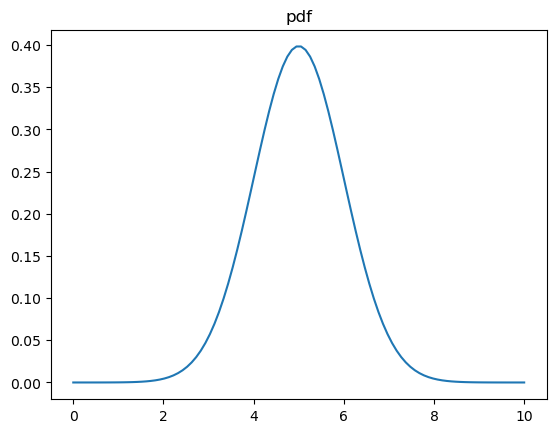

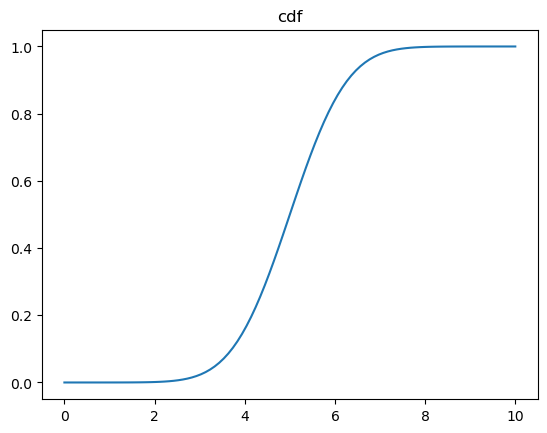

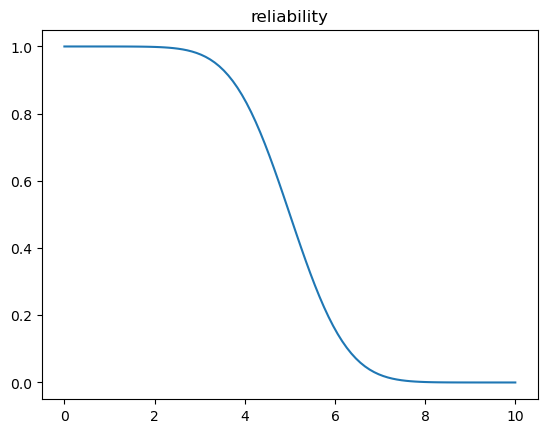

In [2]:
x=np.linspace(0, 10, 100)
dist = lambda x: scipy.stats.norm.pdf(x, 5, 1)
plt.plot(x, dist(x))
plt.title("pdf")
plt.figure()

dist = lambda x: scipy.stats.norm.cdf(x, 5, 1)
plt.plot(x, dist(x))
plt.title("cdf")
plt.figure()

dist = lambda x: 1-scipy.stats.norm.cdf(x, 5, 1)
plt.plot(x, dist(x))
plt.title("reliability")

# 2.2

In [3]:
1-scipy.stats.norm.cdf(800, 1200, 200)

np.float64(0.9772498680518208)

In [4]:
1-scipy.stats.norm.cdf(1600, 1200, 200)

np.float64(0.02275013194817921)

# 2.3

In [5]:
1-scipy.stats.norm.cdf(800, 1300, 400)

np.float64(0.8943502263331446)

In [6]:
1-scipy.stats.norm.cdf(800, 1600, 400)

np.float64(0.9772498680518208)

In [7]:
1-scipy.stats.norm.cdf(800, 1300, 200)

np.float64(0.9937903346742238)

# 2.4 

/var/folders/nw/qn2qj07s7qq860r608rn78hm0000gn/T/nix-shell.7KoGwD/ipykernel_47813/4133997794.py:2: RuntimeWarning: invalid value encountered in power
  return 1-np.exp(-1*np.pow((t-gamma)/eta, beta))


<Figure size 640x480 with 0 Axes>

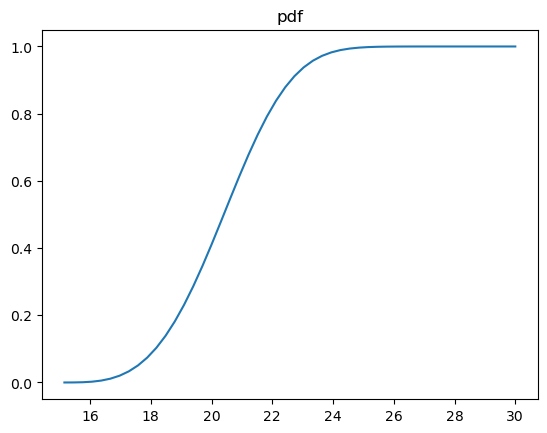

<Figure size 640x480 with 0 Axes>

In [8]:
def weibull_3_cdf(t, gamma, eta, beta):
    return 1-np.exp(-1*np.pow((t-gamma)/eta, beta))

x=np.linspace(0.01, 30, 100)
dist = lambda x: weibull_3_cdf(x, 15, 6, 3.5)
plt.plot(x, dist(x))
plt.title("pdf")
plt.figure()

In [9]:
weibull_3_cdf(18, 15, 6, 3.5) + (1- weibull_3_cdf(23, 15, 6, 3.5))

np.float64(0.14935463648164182)

# 2.5

In [10]:
xlow=11
xhigh=15
dist = lambda x: 1-weibull_3_cdf(x, 9, 4, 1.75)
yhere = 0

ys = []
xs = []
residual = []

while abs(0.3 - yhere) > 1e-16:
    xhere = (xlow+xhigh)/2
    xs.append(float(xhere))
    yhere = dist(xhere)
    residual.append(np.log(abs(float(yhere)-0.3)))
    ys.append(float(yhere))
    if yhere > 0.3:
        xlow = xhere
    else:
        xhigh = xhere
print(xs[-1])

13.447609650895831


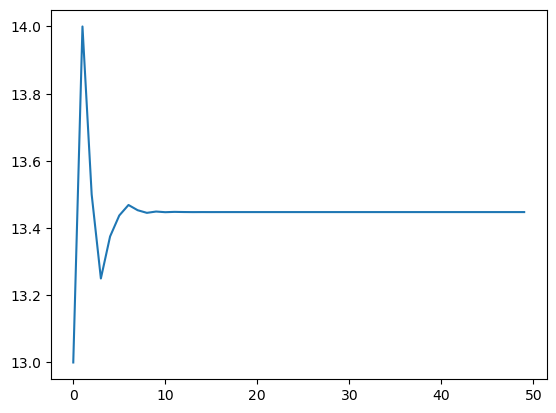

In [11]:
plt.plot(xs)

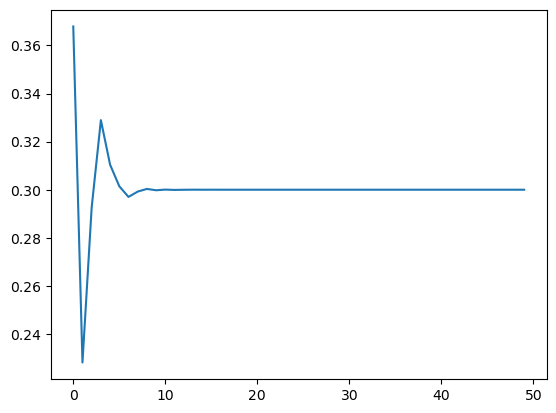

In [12]:
plt.plot(ys)

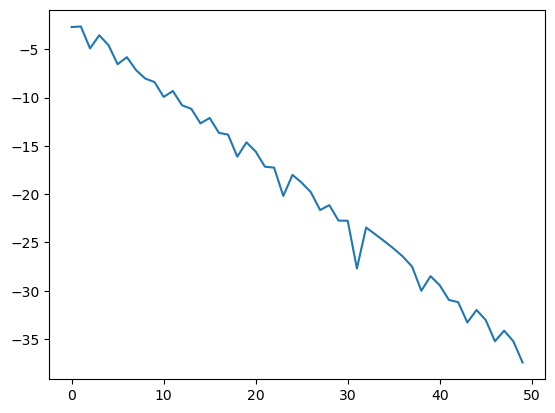

In [13]:
plt.plot(residual)

# 3.1

In [14]:
import sympy

In [15]:
sigma, mu, i = sympy.symbols("sigma mu i")
t = sympy.IndexedBase("t")

In [16]:
l = -(1/(2 * sigma ** 2)) * sympy.Sum((sympy.ln(t[i]) - mu)**2, [i, 1, t])
l

-Sum((-mu + log(t[i]))**2, (i, 1, t))/(2*sigma**2)

In [17]:
sympy.diff(l, mu)

-Sum(2*mu - 2*log(t[i]), (i, 1, t))/(2*sigma**2)

In [18]:
data = np.array([49.5742,39.0231,28.241,15.4782,16.6129,56.0018,39.1695,23.3995,9.34463,25.07,16.3242,7.1327,24.5379,95.74,13.3444,45.9901,22.8084,45.0592,49.9091,10.9584,22.0764,20.182,19.9721,14.9876,12.6724,17.3804,5.13221,21.0974,13.3389,12.4727,14.2646,17.2633,14.3847,17.5576,25.6905,7.18939,33.0662,19.2535,13.5511,20.9923,16.0762,24.9305,12.2074,5.23867,18.3745,16.6716,40.6632,18.8055,12.6727,11.24,21.6383,14.7064,17.601,15.0596,32.7493,18.8793,15.8212,6.69836,11.7989,27.7205,18.9279,72.2692,8.4983,18.6928,13.4246,38.2967,32.851,13.5905,30.0529,15.1524,60.4526,18.3166,5.44084,6.10256,20.3197,8.4967,35.7099,11.3333,31.722,18.1207,11.6619,15.0325,25.5701,20.1378,26.1686,12.1678,38.3752,13.6005,6.39596,10.8213])

In [19]:
mu = 1/len(data) * np.sum(np.log(data))
mu

np.float64(2.9159755439502923)

In [20]:
sigma = np.sqrt((1/len(data)) * np.sum(np.pow(np.log(data) - mu, 2)))
sigma

np.float64(0.5927283191336781)

# 3.2

In [21]:
from scipy.stats import CensoredData, expon

In [22]:
U = [5.9653,4.2605,2.3421,0.7956,0.1604,0.0151,1.2375,8.6255,6.8242,0.7645,3.0238,5.8619]
c_r = 3
data = CensoredData(uncensored = U, right = [24, 24, 24])

a = expon.fit(data)
a

(np.float64(0.015099998512369917), np.float64(9.304061540190666))

np.float64(66.22517208732174)

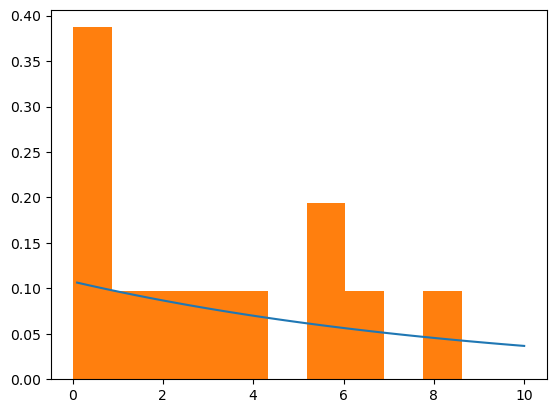

In [23]:
x=np.linspace(0.1, 10, 100)
plt.plot(x, expon.pdf(x, scale = a[1]))
plt.hist(U, density=True)
1/a[0]

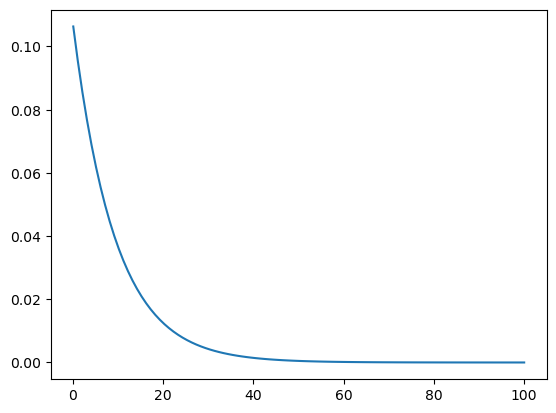

In [24]:
x=np.linspace(0.1, 100, 100)
plt.plot(x, expon.pdf(x, scale = a[1]))

In [25]:
len(U)/(np.sum(U) + 3 * 24)

np.float64(0.10726122756899578)

# 3.3

In [26]:
uncensored = [0.2967,0.3594,0.406,0.5223,0.9752,1.3873,1.4796,1.5322,1.6013,1.6849,2.2832,2.7337,3.1594,3.4113,3.6384,3.7169,4.6646,5.0373,5.0554,6.4226]

cdata = CensoredData(U = uncensored, r = [])



TypeError: CensoredData.__init__() got an unexpected keyword argument 'U'

# 5.3

(np.float64(0.3064603983220001),
 np.float64(0.747444185839),
 np.float64(0.747444185839))

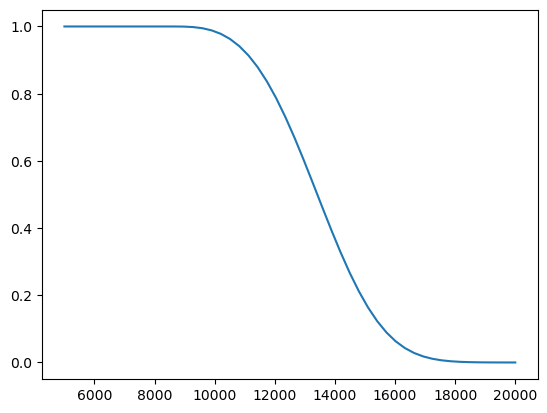

In [57]:
import scipy.special
def weibull_reliability(time, gamma, eta, beta):
    return np.array([np.exp(-np.pow(((t-gamma)/eta), beta))  if t > gamma else 1.0 for t in time])
    

def m_of_n(m, n, reliabilities):
    total = 0

    for i in range(m):
        total += scipy.special.binom(n, i) * reliabilities[i]**i * (1-reliabilities[i])**(n-i)
    return 1-total 

def parallel(reliabilities):
    return m_of_n(1, len(reliabilities), reliabilities)

xs = np.linspace(5000, 20000)
ys = weibull_reliability(xs, 8500, 5500, 3.25)
plt.plot(xs, ys)

(m_of_n(2, 3, [0.3679, 0.3679, 0.3679]), m_of_n(1, 3, [0.3679, 0.3679, 0.3679]), parallel([0.3679, 0.3679, 0.3679]))

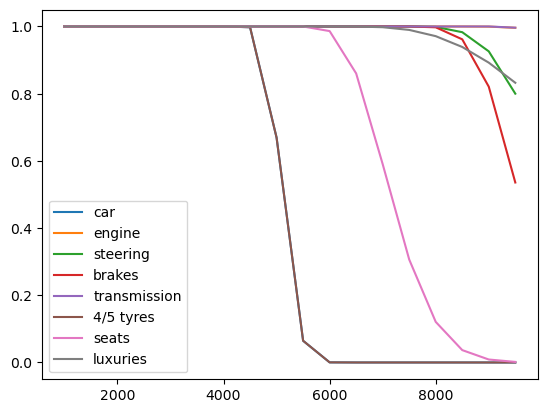

In [76]:
t = np.arange(1000, 10000, 500)

engine = weibull_reliability(t, 8500, 5500, 3.25)
steering = weibull_reliability(t, 7500, 3000, 3.7)
brakes = weibull_reliability(t, 7500, 2250, 4)
transmission = weibull_reliability(t, 9000, 2500, 3.5)
tyre = weibull_reliability(t, 4250, 1250, 2.6)
seat = weibull_reliability(t, 5500, 2000, 1.9)
boot = weibull_reliability(t, 6000, 4100, 1.4)
roof_rack = weibull_reliability(t, 4500, 2300, 1.7)
tow_bar = weibull_reliability(t, 4200, 2250, 3.1)

car = engine * steering * brakes * transmission * m_of_n(4, 5, [tyre, tyre, tyre, tyre, tyre]) * m_of_n(2, 3, [seat, seat, seat]) * parallel([boot, roof_rack, tow_bar])
plt.plot(t, car, label = "car")
plt.plot(t, engine, label = "engine")
plt.plot(t, steering, label = "steering")
plt.plot(t, brakes, label = "brakes")
plt.plot(t, transmission, label = "transmission")
plt.plot(t, m_of_n(4, 5, [tyre, tyre, tyre, tyre, tyre]), label = "4/5 tyres")
plt.plot(t, m_of_n(2, 3, [seat, seat, seat]), label = "seats")
plt.plot(t, parallel([boot, roof_rack, tow_bar]), label = "luxuries")
plt.legend()

In [77]:
tyre

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.84886147e-01,
       7.67230584e-01, 3.67879441e-01, 9.08575594e-02, 9.95101677e-03,
       4.23136082e-04, 6.18688219e-06, 2.77886436e-08, 3.44860895e-11,
       1.06951665e-14, 7.53183599e-19])

# 5.4

In [101]:
t = 750
F = scipy.stats.norm.cdf(t, 550, 200)
R = 1-F

In [102]:
hot = 1 - F * F
hot

np.float64(0.29213901826285904)

In [105]:
inte = lambda tau: scipy.stats.norm.pdf(tau, 550, 200) * (1-scipy.stats.norm.cdf(t - tau, 550, 200))
x = np.linspace(0, t)
thingy = np.trapezoid(inte(x), x)
R + thingy

np.float64(0.8917689124675741)

In [104]:
thingy

np.float64(0.6007851767486829)

In [96]:
F

np.float64(0.8413447460685429)